**NOTE:**
Upload the data set files before running the code (on collab) or run the code in the same path with the data set (Other notebooks)

**For 1.a**





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
x_train = pd.read_csv('madelon_train.data',sep=' ',header=None)
x_train.dropna(axis=1,how='any',inplace=True)
y_train = pd.read_csv('madelon_train.labels',header=None)
test_data=pd.read_csv('madelon_test.data',sep=' ',header=None)
test_data.dropna(axis=1,how='any',inplace=True)
x_cv = pd.read_csv('madelon_valid.data',sep=' ',header=None)
x_cv.dropna(axis=1,how='any',inplace=True)
y_cv = pd.read_csv('madelon_valid.labels',header=None)



In [3]:
i = [1,2,3,4,5,6,7,8,9,10,11,12]
train_accu,cv_accu,missclassif_trainlist,missclassif_testlist=[],[],[],[]
for j in i:
  clf=DecisionTreeClassifier(max_depth=j)
  clf.fit(x_train, y_train)
  pre = clf.predict(x_cv)
  pre = np.reshape(pre,(-1,1))
  pre_x_train = clf.predict(x_train)
  pre_x_train = np.reshape(pre_x_train,(-1,1))
  train_accu.append(clf.score(x_train,y_train))#training accurary
  cv_accu.append(accuracy_score(pre,y_cv))
  missclassif_testlist.append((1-accuracy_score(pre, y_cv))*600)
  missclassif_trainlist.append((1-accuracy_score(pre_x_train, y_train))*2000)
print(train_accu,cv_accu,i,missclassif_testlist,missclassif_trainlist)


[0.6225, 0.651, 0.7165, 0.7925, 0.8585, 0.912, 0.947, 0.964, 0.9795, 0.991, 0.9945, 0.998] [0.6116666666666667, 0.665, 0.715, 0.7483333333333333, 0.7933333333333333, 0.7983333333333333, 0.7933333333333333, 0.775, 0.7666666666666667, 0.7633333333333333, 0.7483333333333333, 0.7683333333333333] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] [232.99999999999997, 200.99999999999997, 171.00000000000003, 151.00000000000003, 124.0, 121.0, 124.0, 135.0, 139.99999999999997, 142.00000000000003, 151.00000000000003, 139.0] [754.9999999999999, 698.0, 567.0, 415.00000000000006, 282.99999999999994, 175.99999999999994, 106.0000000000001, 72.00000000000006, 40.99999999999993, 18.000000000000014, 10.999999999999899, 4.0000000000000036]


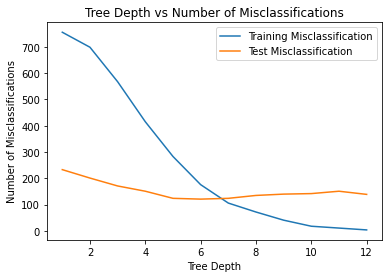

In [4]:
plt.xlabel('Tree Depth')
plt.ylabel('Number of Misclassifications')
plt.title("Tree Depth vs Number of Misclassifications")
plt.plot(i,missclassif_trainlist,label='Training Misclassification')
plt.plot(i,missclassif_testlist,label='Test Misclassification')
plt.legend()

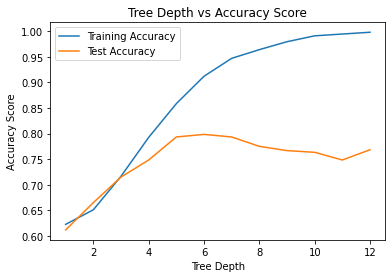

In [5]:
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Score')
plt.title("Tree Depth vs Accuracy Score")
plt.plot(i,train_accu,label='Training Accuracy')
plt.plot(i,cv_accu,label='Test Accuracy')
plt.legend()

In [6]:
temp1 = np.array(missclassif_trainlist)
temp1 = temp1/2000
training_error = temp1*100
temp2 = np.array(missclassif_testlist)
temp2 = temp2/600
test_error = temp2*100


In [7]:
training_error


array([37.75, 34.9 , 28.35, 20.75, 14.15,  8.8 ,  5.3 ,  3.6 ,  2.05,
        0.9 ,  0.55,  0.2 ])

In [8]:
test_error

array([38.83333333, 33.5       , 28.5       , 25.16666667, 20.66666667,
       20.16666667, 20.66666667, 22.5       , 23.33333333, 23.66666667,
       25.16666667, 23.16666667])

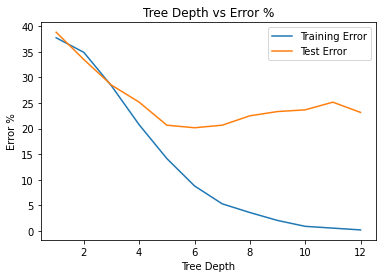

In [9]:
plt.xlabel('Tree Depth')
plt.ylabel('Error %')
plt.title("Tree Depth vs Error %")
plt.plot(i,training_error,label='Training Error')
plt.plot(i,test_error,label='Test Error')
plt.legend()

**For 1.b**

In [10]:
x_train = pd.read_csv('wilt_train.csv',header=None)
y_train = pd.read_csv('wilt_train.labels',header=None)
x_test = pd.read_csv('wilt_test.csv',header=None)
y_test=  pd.read_csv('wilt_test.labels',header=None)

In [11]:
i = [1,2,3,4,5,6,7,8,9,10]
train_accu,cv_accu,missclassif_trainlist,missclassif_testlist=[],[],[],[]
for j in i:
  clf=DecisionTreeClassifier(max_depth=j)
  clf.fit(x_train, y_train)
  pre = clf.predict(x_test)
  pre = np.reshape(pre,(-1,1))
  pre_x_train = clf.predict(x_train)
  pre_x_train = np.reshape(pre_x_train,(-1,1))
  train_accu.append(clf.score(x_train,y_train))#training accurary
  cv_accu.append(accuracy_score(pre,y_test))
  missclassif_testlist.append((1-accuracy_score(pre, y_test))*500)
  missclassif_trainlist.append((1-accuracy_score(pre_x_train, y_train))*4339)
print(train_accu,cv_accu,i,missclassif_testlist,missclassif_trainlist)

[0.9829453791196128, 0.9912422217100715, 0.9930859645079512, 0.9960820465545056, 0.9983867250518552, 0.9993085964507951, 0.999769532150265, 1.0, 1.0, 1.0] [0.626, 0.752, 0.768, 0.792, 0.808, 0.816, 0.804, 0.808, 0.812, 0.798] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [187.0, 124.0, 115.99999999999999, 103.99999999999999, 95.99999999999997, 92.00000000000003, 97.99999999999997, 95.99999999999997, 93.99999999999997, 100.99999999999997] [74.00000000000018, 37.999999999999844, 29.99999999999988, 17.00000000000017, 7.000000000000212, 3.0000000000002287, 1.0000000000002367, 0.0, 0.0, 0.0]


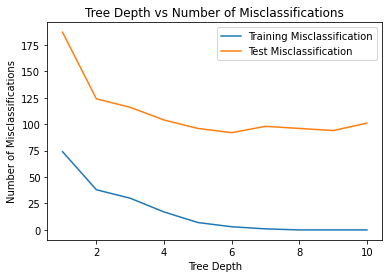

In [12]:
plt.xlabel('Tree Depth')
plt.ylabel('Number of Misclassifications')
plt.title("Tree Depth vs Number of Misclassifications")
plt.plot(i,missclassif_trainlist,label='Training Misclassification')
plt.plot(i,missclassif_testlist,label='Test Misclassification')
plt.legend()

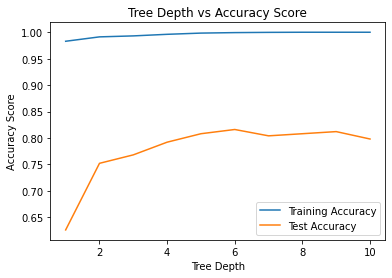

In [13]:
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Score')
plt.title("Tree Depth vs Accuracy Score")
plt.plot(i,train_accu,label='Training Accuracy')
plt.plot(i,cv_accu,label='Test Accuracy')
plt.legend()

In [14]:
temp1 = np.array(missclassif_trainlist)
temp1 = temp1/4339
training_error=temp1*100
temp2 = np.array(missclassif_testlist)
temp2 = temp2/500
test_error = temp2*100


In [15]:
training_error

array([1.70546209, 0.87577783, 0.69140355, 0.39179534, 0.16132749,
       0.06914035, 0.02304678, 0.        , 0.        , 0.        ])

In [16]:
test_error

array([37.4, 24.8, 23.2, 20.8, 19.2, 18.4, 19.6, 19.2, 18.8, 20.2])

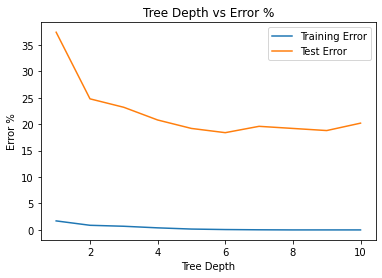

In [17]:
plt.xlabel('Tree Depth')
plt.ylabel('Error %')
plt.title("Tree Depth vs Error %")
plt.plot(i,training_error,label='Training Error')
plt.plot(i,test_error,label='Test Error')
plt.legend()